<a href="https://colab.research.google.com/github/maciejlehmann/amw-wdum/blob/main/Lab9/Lab9_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

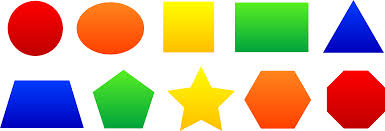

-1

In [17]:
import argparse
import imutils
import cv2
from google.colab.patches import cv2_imshow

# Wczytywanie i wyświetlanie obrazka

image = cv2.imread('fig.jpg')
cv2_imshow(image)
cv2.waitKey(0)

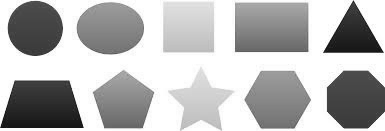

-1

In [19]:
# Konwersja obrazka do skali szarości

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)
cv2.waitKey(0)

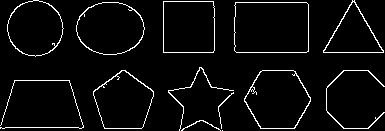

-1

In [20]:
# Wykrywanie krawędzi

edged = cv2.Canny(gray, 30, 150)
cv2_imshow(edged)
cv2.waitKey(0)

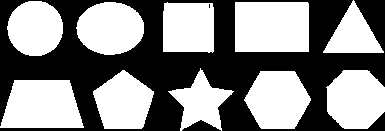

-1

In [21]:
# Progowanie - uzyskiwanie obrazu binarnego na podstawie obrazu bazowego

thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]
cv2_imshow(thresh)
cv2.waitKey(0)

In [ ]:
# Obrysowanie każdego z elementów na obrazku

cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()

for c in cnts:
	cv2.drawContours(output, [c], -1, (255, 255, 0), 3)
	cv2_imshow(output)
	cv2.waitKey(0)

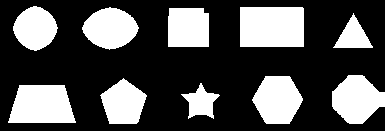

-1

In [24]:
# Usuwanie szumu z obrazka binarnego

mask = thresh.copy()
mask = cv2.erode(mask, None, iterations=5)
cv2_imshow(mask)
cv2.waitKey(0)

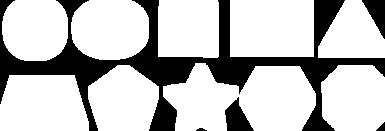

-1

In [25]:
# Powiększenie obszarów zainteresowania

mask = thresh.copy()
mask = cv2.dilate(mask, None, iterations=5)
cv2_imshow(mask)
cv2.waitKey(0)

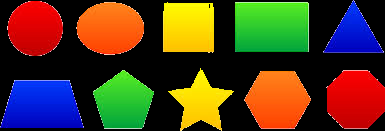

-1

In [26]:
# Maskowanie obszarów, którymi nie jesteśmy zainteresowani

mask = thresh.copy()
output = cv2.bitwise_and(image, image, mask=mask)
cv2_imshow(output)
cv2.waitKey(0)